In [2377]:
##Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import plotly.express as px
from pandas import plotting
import missingno as ms
from sklearn.impute import SimpleImputer
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from itertools import product
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

In [2378]:
df = pd.read_csv("Leads.csv")

In [2379]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [2380]:
df.shape

(9240, 37)

In [2381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [2382]:
# check for duplicates
sum(df.duplicated(subset = 'Prospect ID')) == 0

True

In [2383]:
# check for duplicates
sum(df.duplicated(subset = 'Lead Number')) == 0

True

##### The "Prospect ID" and "Lead Number" columns have no duplicate values 

In [2384]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending = False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [2385]:
##We observe that there are 'Select' values in many columns.It may be because the customer did not select any option from the list, hence it shows 'Select'.
## 'Select' values are as good as NULL. So we can convert these values to null values.

df = df.replace('Select', np.nan)

In [2386]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [2387]:
##We see that for some columns we have high percentage of missing values. We can drop the columns with missing values greater than 40% .

df = df.drop(columns=['How did you hear about X Education','Lead Profile','Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Activity Index','Asymmetrique Profile Index'])

In [2388]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending = False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

In [2389]:
### Checking value counts of "City" column
df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [2390]:
# Since Mumbai is the most common occurence among the non-missing values we can impute all missing values with Mumbai

df['City'] = df['City'].replace(np.nan,'Mumbai')

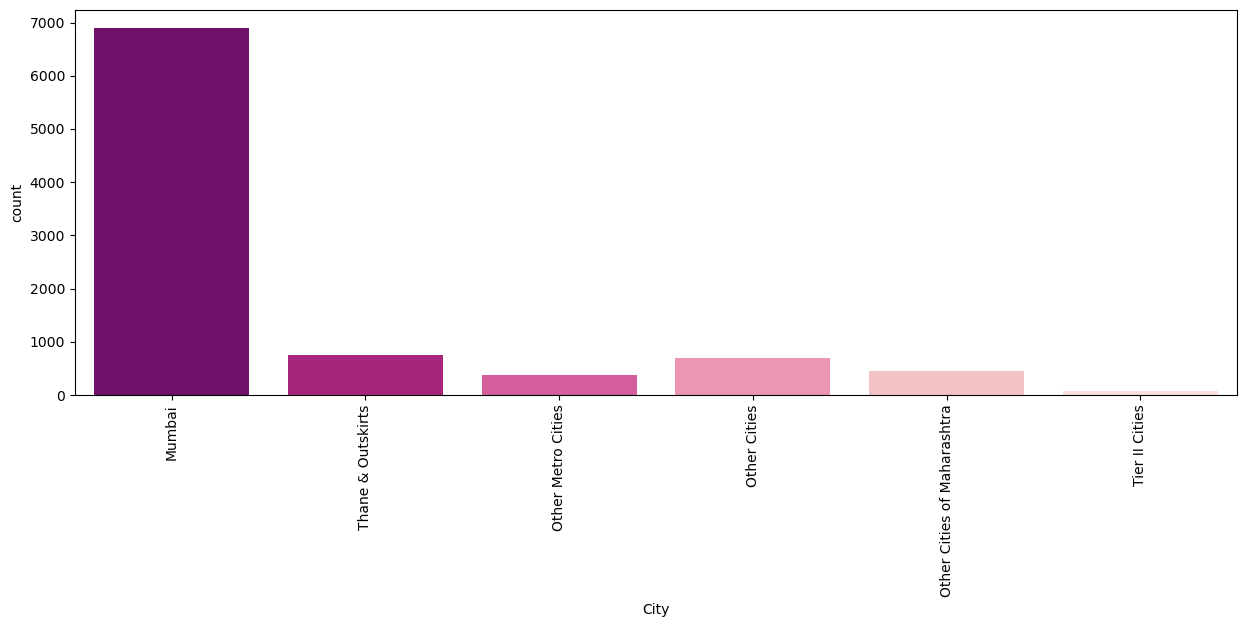

In [2391]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df.City,palette = "RdPu_r")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [2392]:
### Checking value counts of "Country" column
df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [2393]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India

df['Country'] = df['Country'].replace(np.nan,'India')

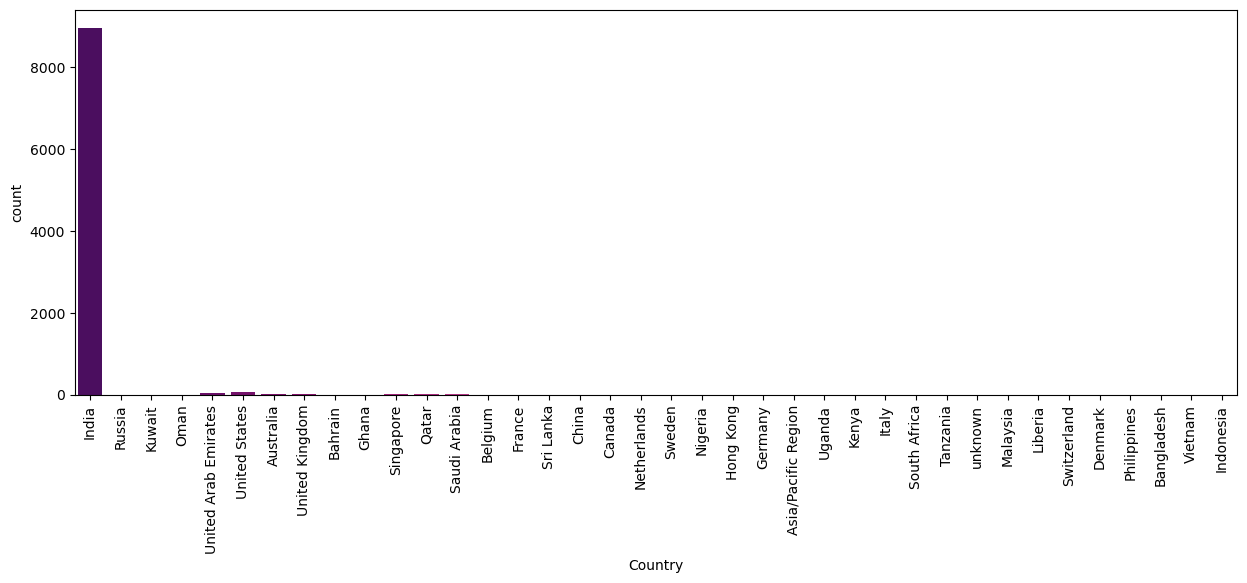

In [2394]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df.Country,palette = "RdPu_r")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Based on the above count plot we can say that mostly audience are from "India"

In [2395]:
### Checking value counts of "Specialization" column
df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [2396]:
### There are more NaN values present in the Specialization column .It may be possible that the lead may leave this column blank if he may be a student or his specialization is not there in the options given. So we can create a another category 'Others'

df['Specialization'] = df['Specialization'].replace(np.nan,'Others')

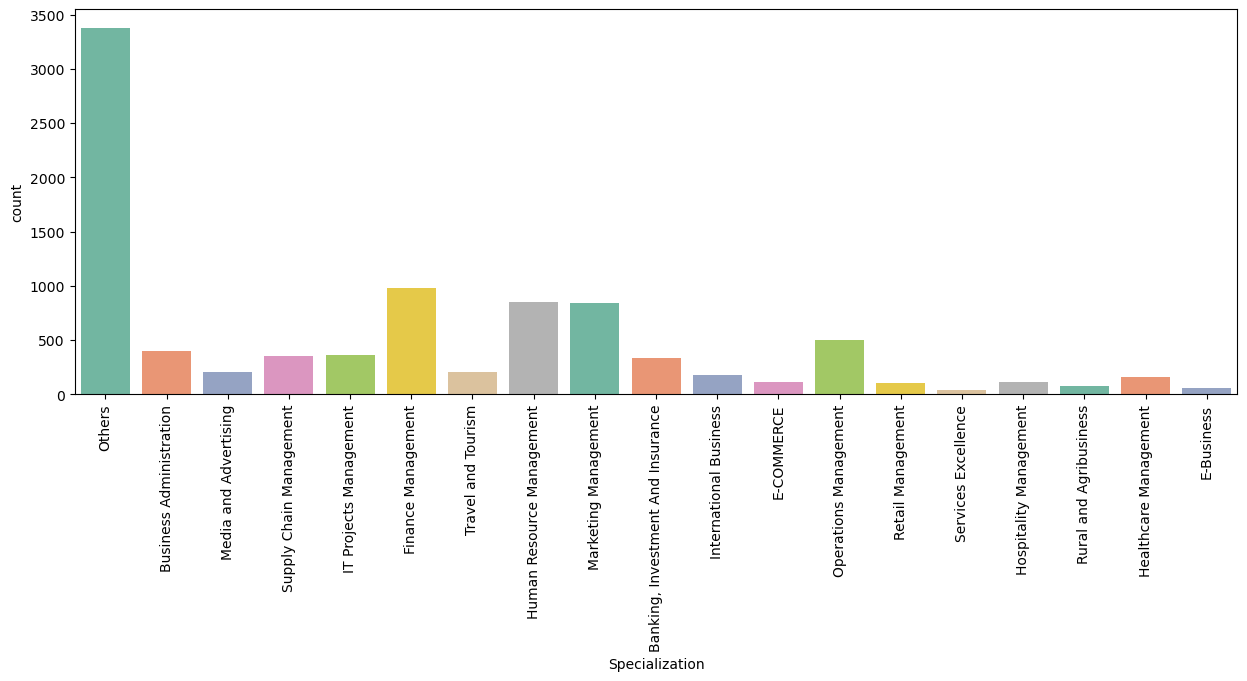

In [2397]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df.Specialization,palette = "Set2")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [2398]:
### Checking value counts of "Tags" column
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [2399]:
# Since "Will revert after reading the email" is the most common occurence among the non-missing values we can impute all NAN values with "Will revert after reading the email"

df['Tags'] = df['Tags'].replace(np.nan,'Will revert after reading the email')


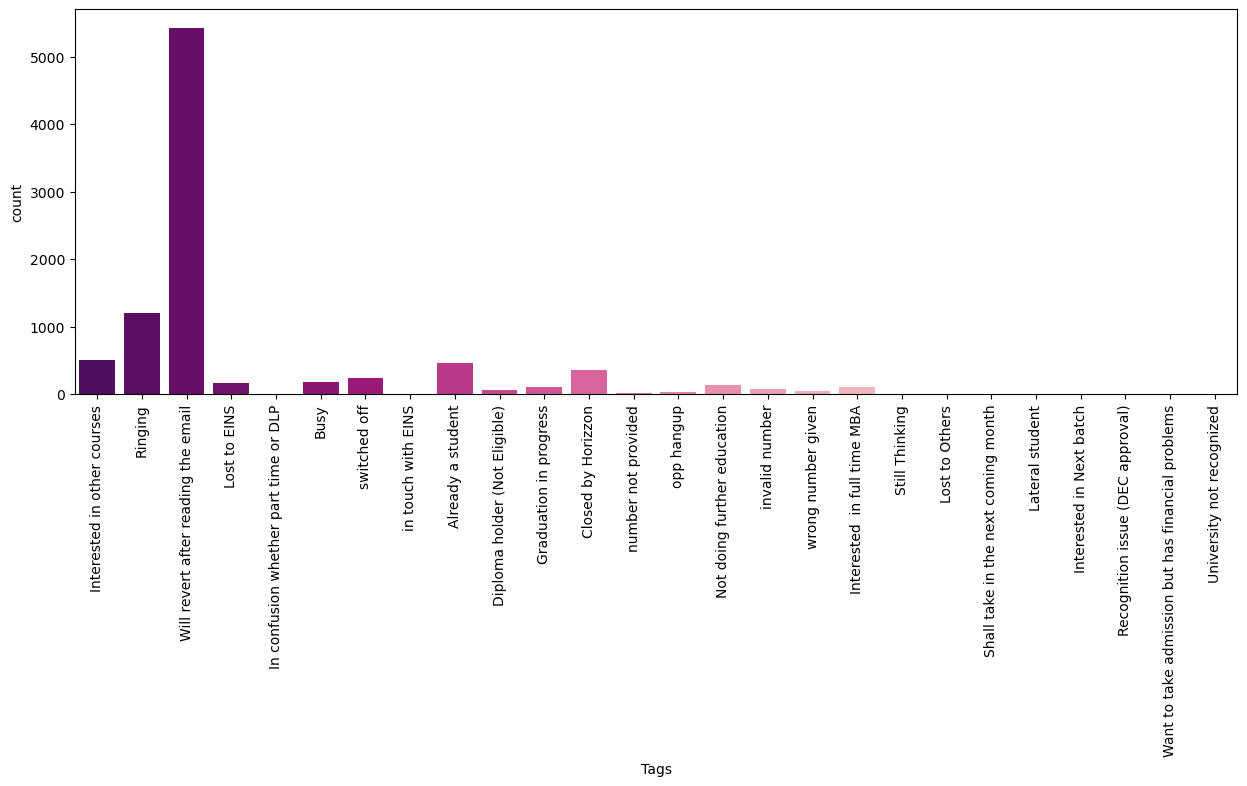

In [2400]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df.Tags,palette = "RdPu_r")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [2401]:
### Checking value counts of "What matters most to you in choosing a course" column
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

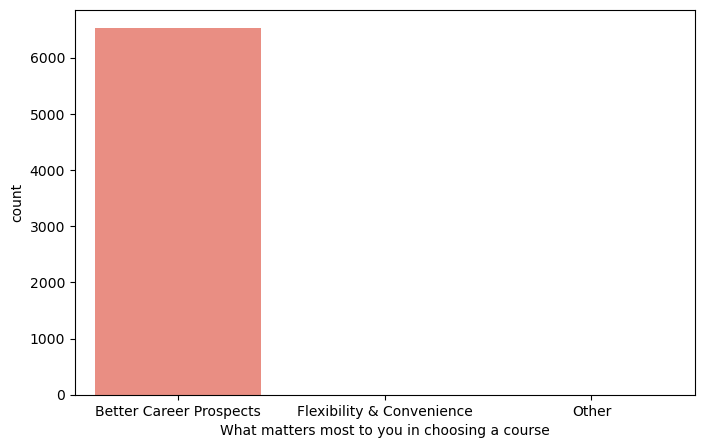

In [2402]:
plt.figure(figsize=(8,5))
s1=sns.countplot(df['What matters most to you in choosing a course'],color="Salmon")
s1.set_xticklabels(s1.get_xticklabels(),rotation=0)
plt.show()

In [2403]:
# Finding the percentage of the different categories of 'What matters most to you in choosing a course' column:
round(df['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

In [2404]:
# Since one category is highly skewed we can drop this column
df=df.drop('What matters most to you in choosing a course',axis=1)

In [2405]:
### Checking value counts of "What is your current occupation" column
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [2406]:
# Since Unemployed is the most common occurence among the non-missing values we can impute all missing values with 'Unemployed' value

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan,'Unemployed')

In [2407]:
## Checking for column null percentage in dataset
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending = False)

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Lead Source                                 0.389610
Prospect ID                                 0.000000
X Education Forums                          0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
City                                        0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Tags                                        0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
Search                                      0.000000
Newspaper Article                           0.000000
Magazine                                    0.

In [2408]:
# From above code we see that the missing percentage is less than 2%, hence we can drop the rows with null vales
df.dropna(inplace = True)

#### Univariate and Bivariate Analysis

##### Visualizing count of Variable based on Converted value

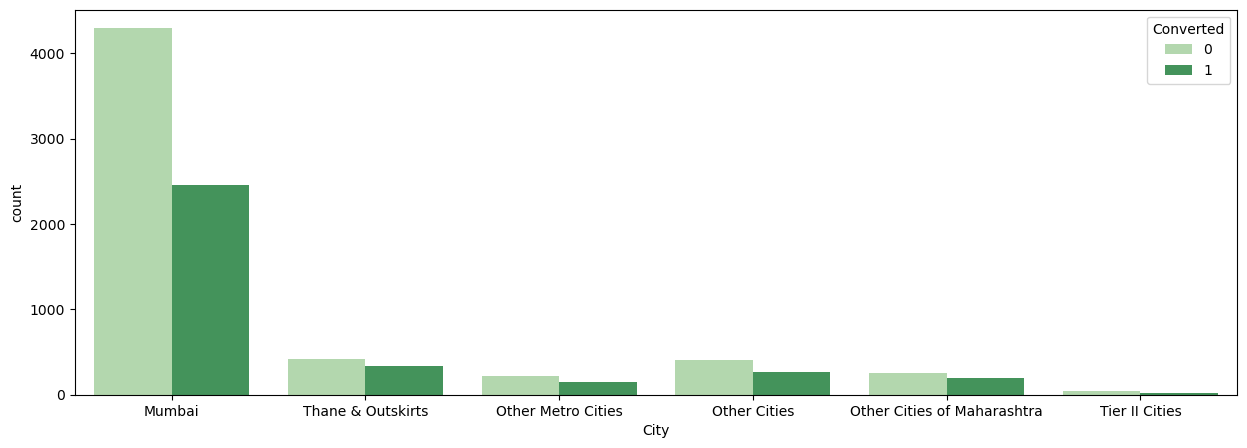

In [2409]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df.City, hue=df.Converted,palette = "Greens")
s1.set_xticklabels(s1.get_xticklabels(),rotation=0)
plt.show()

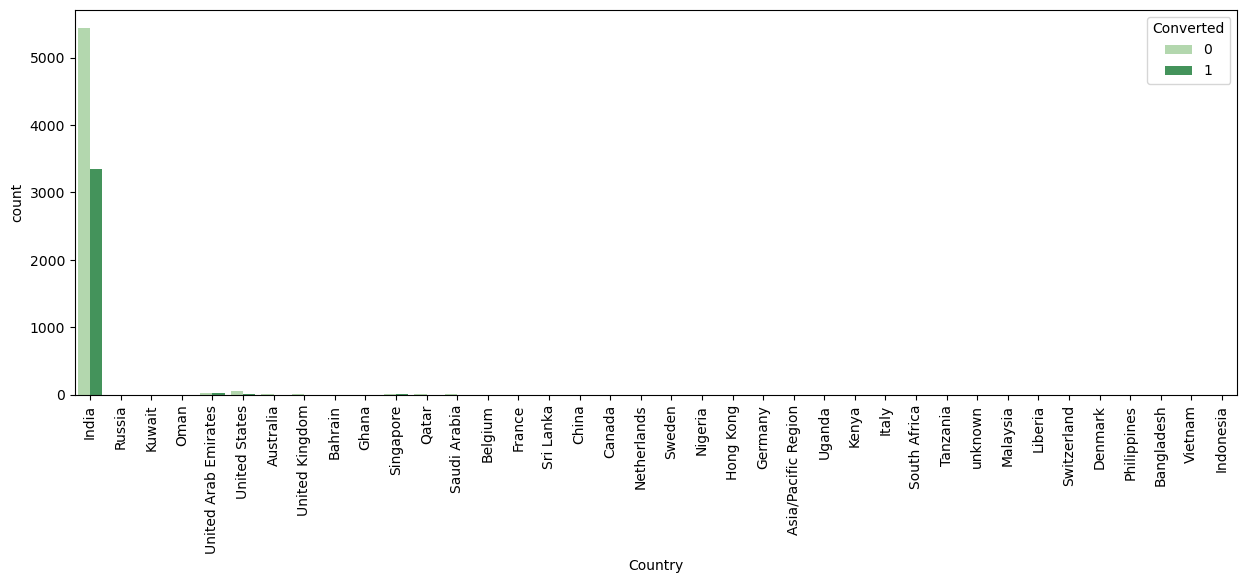

In [2410]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df.Country, hue=df.Converted,palette = "Greens")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
sns.move_legend(s1, "upper right")
plt.show()

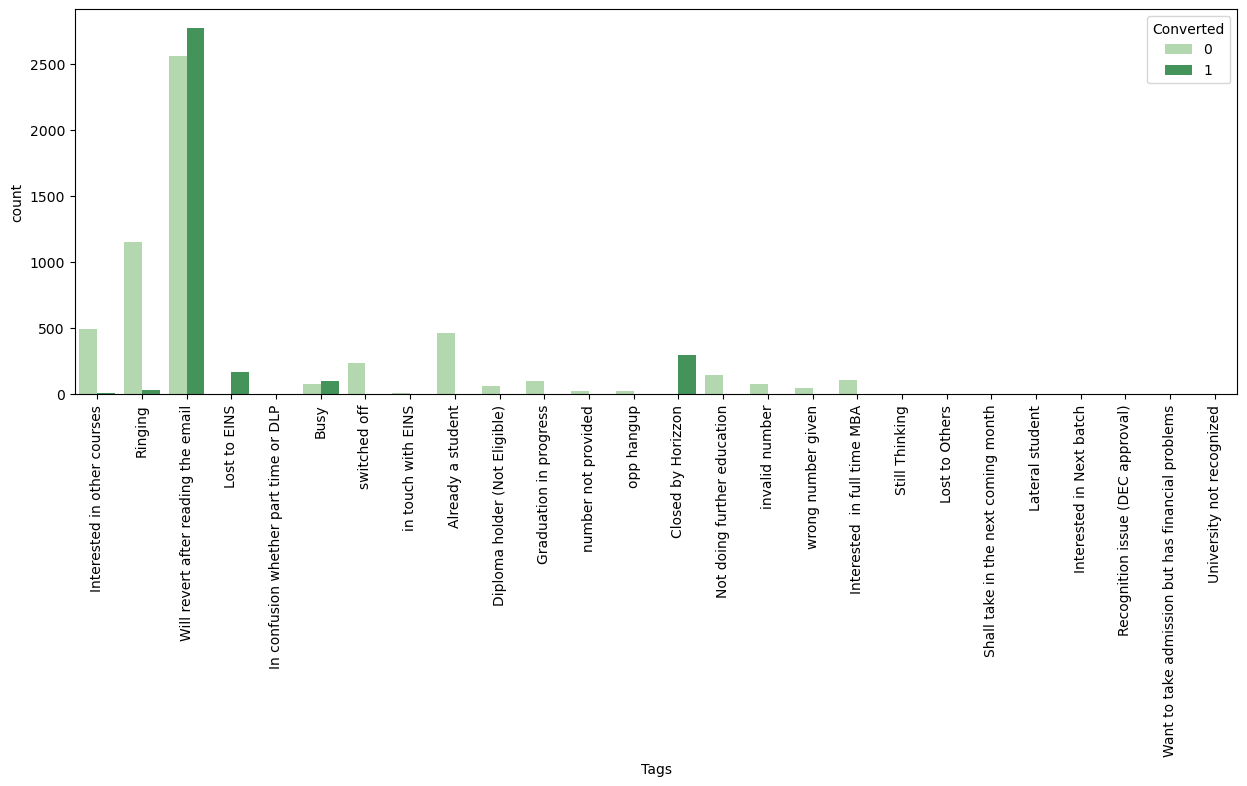

In [2411]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df.Tags, hue=df.Converted,palette = "Greens")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
sns.move_legend(s1, "upper right")
plt.show()

In [2412]:
# Finding the percentage of the different categories of 'Tags' column:
round(df['Tags'].value_counts(normalize=True),2)*100

Will revert after reading the email                  59.0
Ringing                                              13.0
Interested in other courses                           6.0
Already a student                                     5.0
Closed by Horizzon                                    3.0
switched off                                          3.0
Busy                                                  2.0
Lost to EINS                                          2.0
Not doing further education                           2.0
Interested  in full time MBA                          1.0
Graduation in progress                                1.0
invalid number                                        1.0
Diploma holder (Not Eligible)                         1.0
wrong number given                                    1.0
opp hangup                                            0.0
number not provided                                   0.0
in touch with EINS                                    0.0
Lost to Others

In [2413]:
# Replacing Low frequency categories with "Other_tags" value
Cols = df[df['Tags'].isin(df['Tags'].value_counts()[round(df['Tags'].value_counts(normalize=True),2)*100 <=5].index)].Tags.unique()
df['Tags'] = df['Tags'].replace(Cols,'Other_tags')

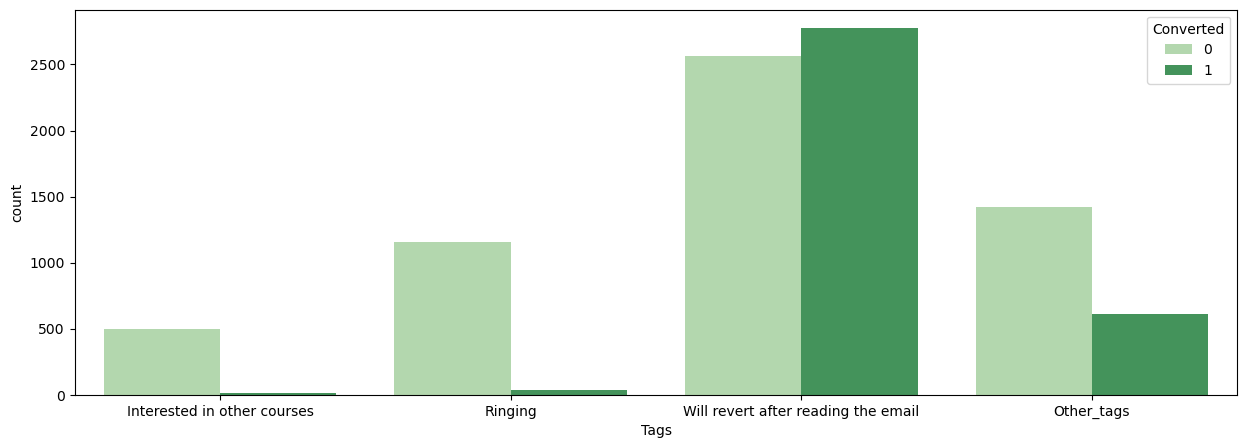

In [2414]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df.Tags, hue=df.Converted,palette = "Greens")
s1.set_xticklabels(s1.get_xticklabels(),rotation=0)
sns.move_legend(s1, "upper right")
plt.show()

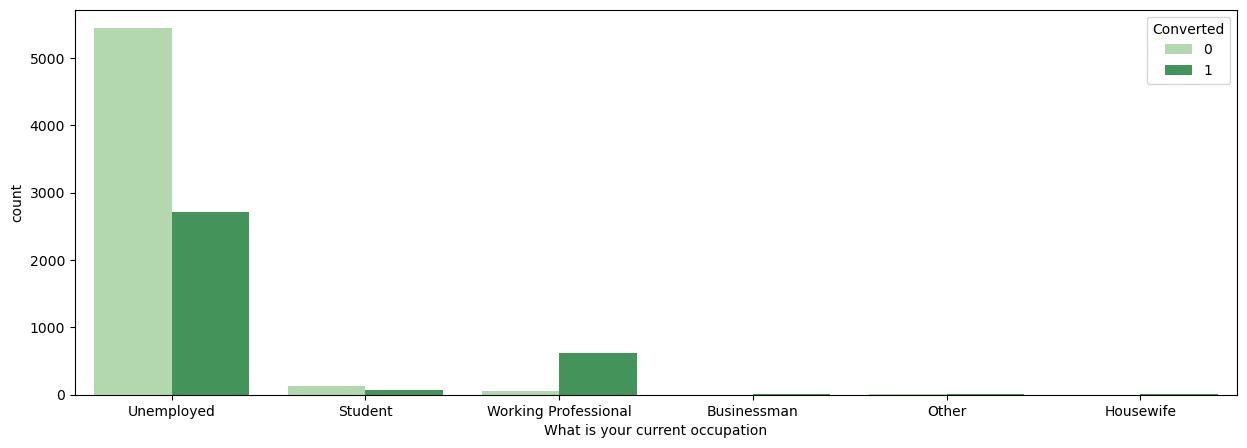

In [2415]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df['What is your current occupation'], hue=df.Converted,palette = "Greens")
s1.set_xticklabels(s1.get_xticklabels(),rotation=0)
sns.move_legend(s1, "upper right")
plt.show()

In [2416]:
# Finding the percentage of the different categories of 'Lead Source' column:
round(df['Lead Source'].value_counts(normalize=True),2)*100

Google               32.0
Direct Traffic       28.0
Olark Chat           19.0
Organic Search       13.0
Reference             5.0
Welingak Website      1.0
Referral Sites        1.0
Facebook              0.0
bing                  0.0
google                0.0
Click2call            0.0
Press_Release         0.0
Social Media          0.0
Live Chat             0.0
youtubechannel        0.0
testone               0.0
Pay per Click Ads     0.0
welearnblog_Home      0.0
WeLearn               0.0
blog                  0.0
NC_EDM                0.0
Name: Lead Source, dtype: float64

In [2417]:
# Combining categories and low frequency values as 'Others'
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')

df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others') 


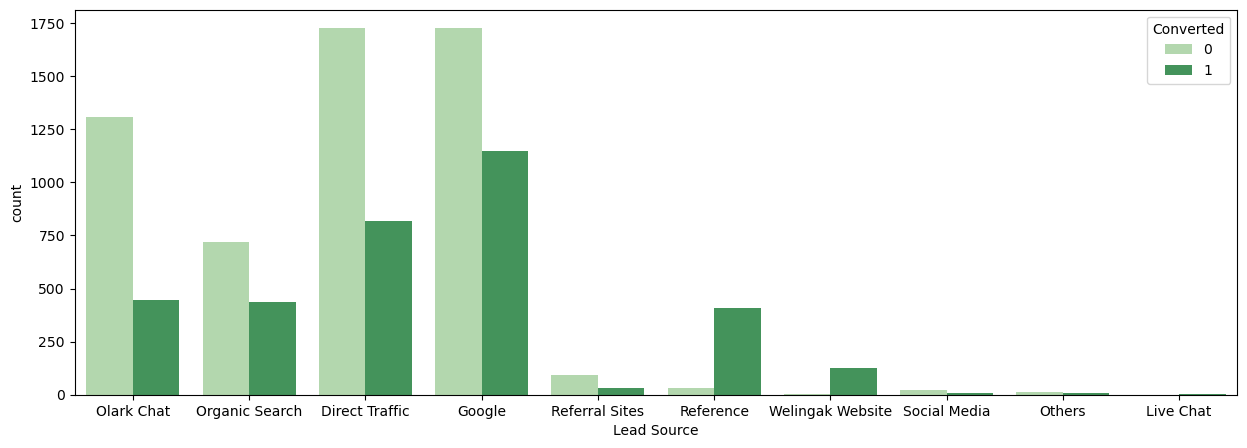

In [2418]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df['Lead Source'], hue=df.Converted,palette = "Greens")
s1.set_xticklabels(s1.get_xticklabels(),rotation=0)
sns.move_legend(s1, "upper right")
plt.show()

-  Maximum number of leads are generated by Google and Direct traffic.
-  Conversion Rate of reference leads and leads through welingak website is high.

In [2419]:
# Finding the percentage of the different categories of 'Last Activity' column:
round(df['Last Activity'].value_counts(normalize=True),2)*100

Email Opened                    38.0
SMS Sent                        30.0
Olark Chat Conversation         11.0
Page Visited on Website          7.0
Converted to Lead                5.0
Email Bounced                    3.0
Email Link Clicked               3.0
Form Submitted on Website        1.0
Unreachable                      1.0
Unsubscribed                     1.0
Had a Phone Conversation         0.0
View in browser link Clicked     0.0
Approached upfront               0.0
Email Received                   0.0
Email Marked Spam                0.0
Visited Booth in Tradeshow       0.0
Resubscribed to emails           0.0
Name: Last Activity, dtype: float64

In [2420]:
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                  'View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails',
                                                  'Visited Booth in Tradeshow'],'Others')

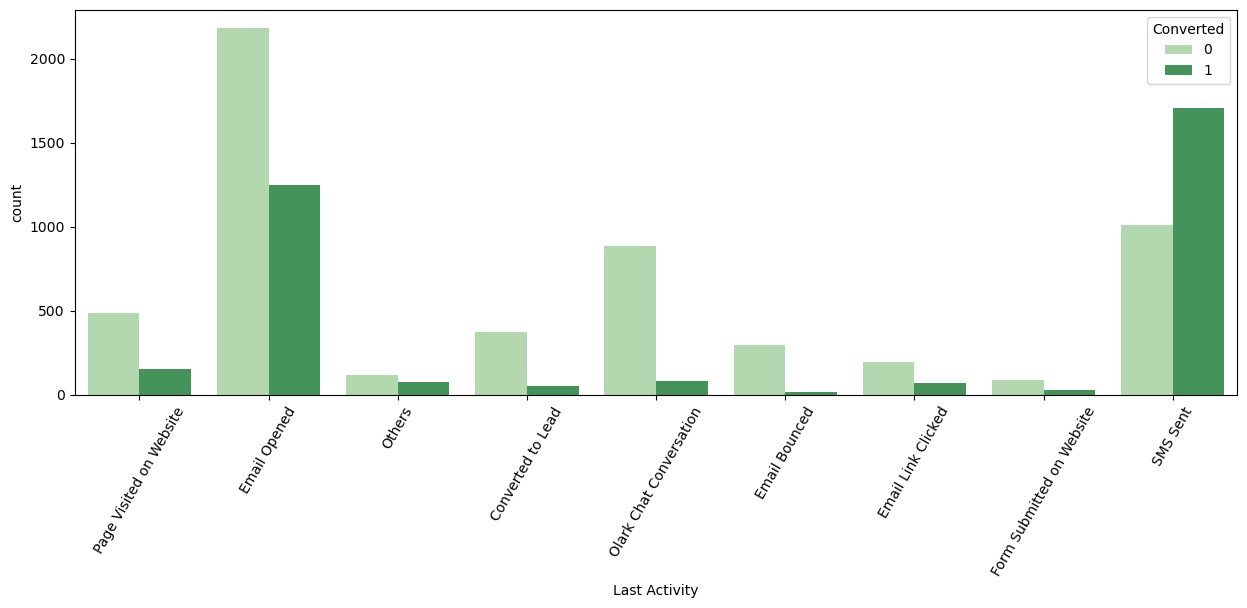

In [2421]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df['Last Activity'], hue=df.Converted,palette = "Greens")
s1.set_xticklabels(s1.get_xticklabels(),rotation=60)
sns.move_legend(s1, "upper right")
plt.show()

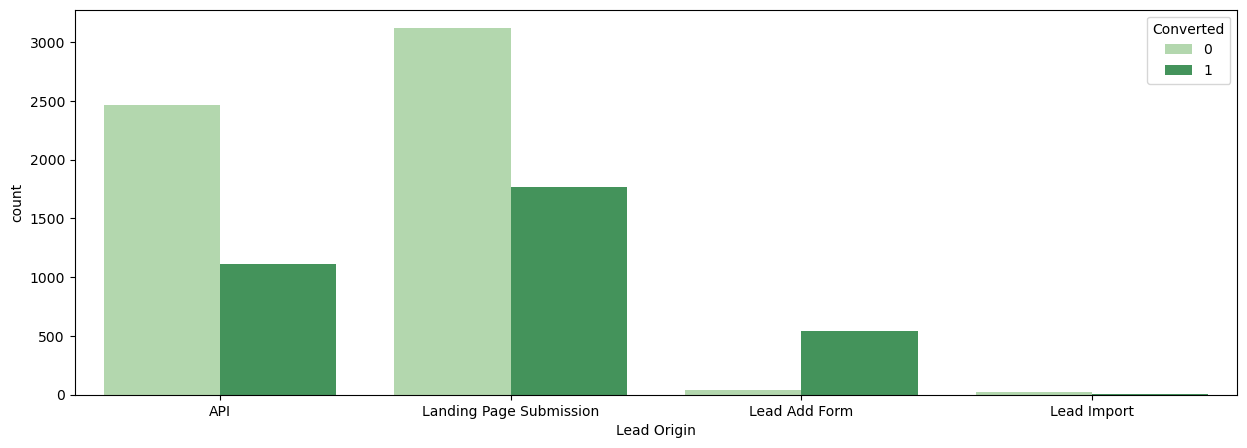

In [2422]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df['Lead Origin'], hue=df.Converted,palette = "Greens")
s1.set_xticklabels(s1.get_xticklabels(),rotation=0)
sns.move_legend(s1, "upper right")
plt.show()

- API and Landing Page Submission bring higher number of leads as well as conversion.
- Lead Add Form has a very high conversion rate but count of leads are low.

In [2423]:
# Finding the percentage of the different categories of 'Last Notable Activity' column:
round(df['Last Notable Activity'].value_counts(normalize=True),2)*100

Modified                        36.0
Email Opened                    31.0
SMS Sent                        24.0
Page Visited on Website          4.0
Olark Chat Conversation          2.0
Email Link Clicked               2.0
Email Bounced                    1.0
Unsubscribed                     0.0
Unreachable                      0.0
Had a Phone Conversation         0.0
Email Marked Spam                0.0
Approached upfront               0.0
Resubscribed to emails           0.0
View in browser link Clicked     0.0
Form Submitted on Website        0.0
Email Received                   0.0
Name: Last Notable Activity, dtype: float64

In [2424]:
# Replacing Low frequency categories with "Others" 
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam',
                                                                      'Unreachable','Unsubscribed','Email Bounced',                                                                    
                                                                      'Resubscribed to emails','View in browser link Clicked',
                                                                      'Approached upfront','Form Submitted on Website', 
                                                                      'Email Received'],'Others')

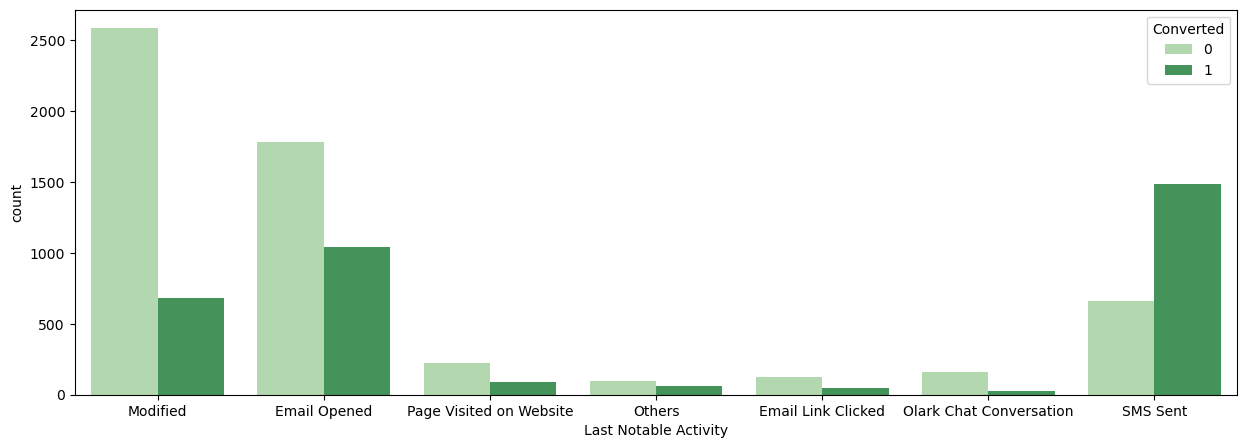

In [2425]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df['Last Notable Activity'], hue=df.Converted,palette = "Greens")
s1.set_xticklabels(s1.get_xticklabels(),rotation=0)
sns.move_legend(s1, "upper right")
plt.show()

In [2426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

In [2427]:
# checking value counts for various columns in dataframe
df['Do Not Email'].value_counts(dropna=False)

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [2428]:
df['Do Not Call'].value_counts(dropna=False)

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [2429]:
df['Search'].value_counts(dropna=False)

No     9060
Yes      14
Name: Search, dtype: int64

In [2430]:
df['Magazine'].value_counts(dropna=False)

No    9074
Name: Magazine, dtype: int64

In [2431]:
df['Newspaper Article'].value_counts(dropna=False)

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [2432]:
df['X Education Forums'].value_counts(dropna=False)

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [2433]:
df['Newspaper'].value_counts(dropna=False)

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [2434]:
df['Digital Advertisement'].value_counts(dropna=False)

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [2435]:
df['Through Recommendations'].value_counts(dropna=False)

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [2436]:
df['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [2437]:
df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [2438]:
df['Get updates on DM Content'].value_counts(dropna=False)

No    9074
Name: Get updates on DM Content, dtype: int64

In [2439]:
df['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

In [2440]:
df['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [2441]:
## Drop the columns that has very high category value
col_to_drop = ['Country','Lead Number','Do Not Call','Search',
'Magazine','Newspaper Article','X Education Forums','Newspaper',
'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

df = df.drop(col_to_drop,1)

In [2442]:
#dataframe after dropping columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Do Not Email                            9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Specialization                          9074 non-null   object 
 10  What is your current occupation         9074 non-null   obje

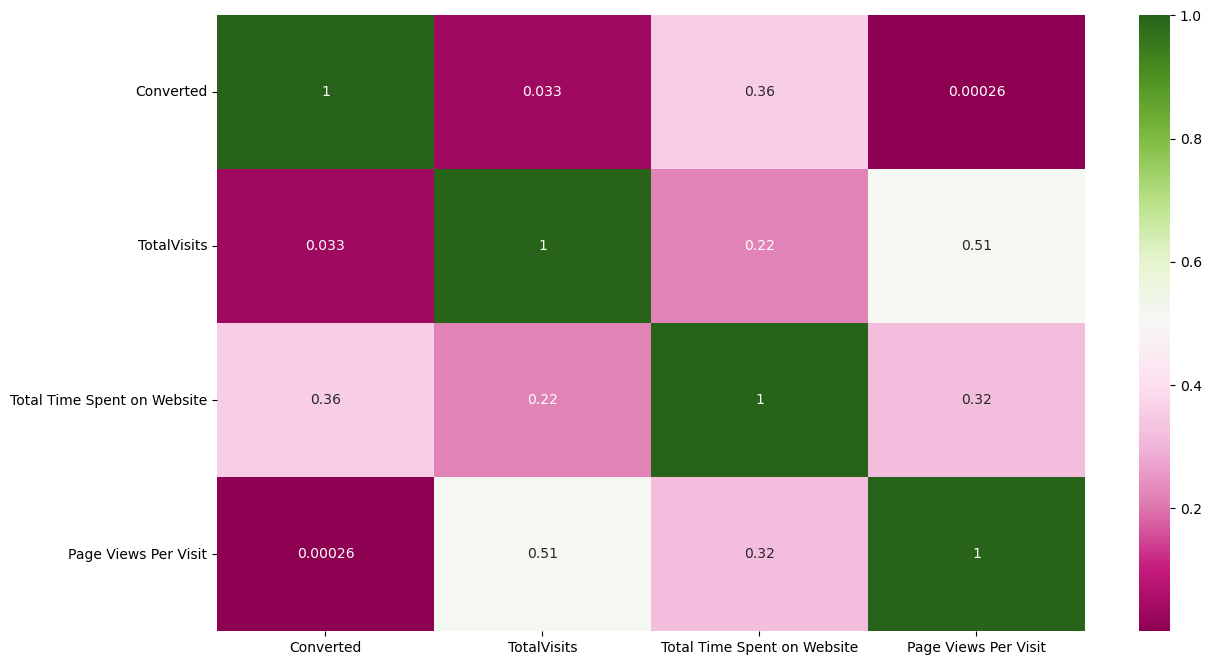

In [2443]:
#plotiing thr heat map for checking corelation
plt.figure(figsize = (14, 8))
sns.heatmap(df.corr(), annot = True, cmap="PiYG")
plt.show()

#### Outlier Analysis

<AxesSubplot:xlabel='Total Time Spent on Website'>

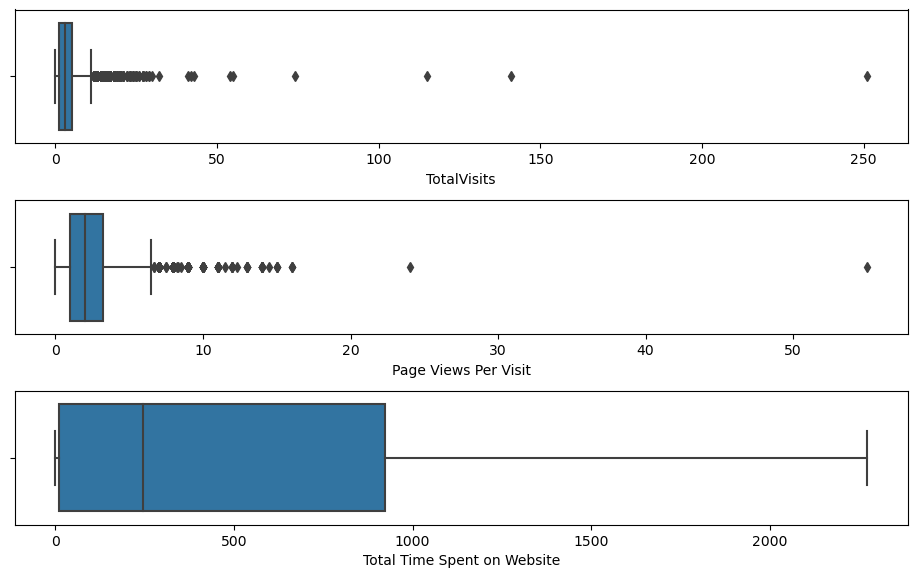

In [2444]:
#checking for outliers
fig, axes = plt.subplots(3,1,figsize=(10,6))
fig.tight_layout(pad=2.0)
sns.boxplot(df['TotalVisits'],ax=axes[0])
sns.boxplot(df['Page Views Per Visit'],ax=axes[1]) 
sns.boxplot(df['Total Time Spent on Website'],ax=axes[2])


In [2445]:
# Outlier treatment on "TotalVisits": Remove top & bottom 1% of the Column Outlier values

percentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

# Outlier treatment on "Page Views Per Visit" : Remove top & bottom 1% of the Column Outlier values

percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

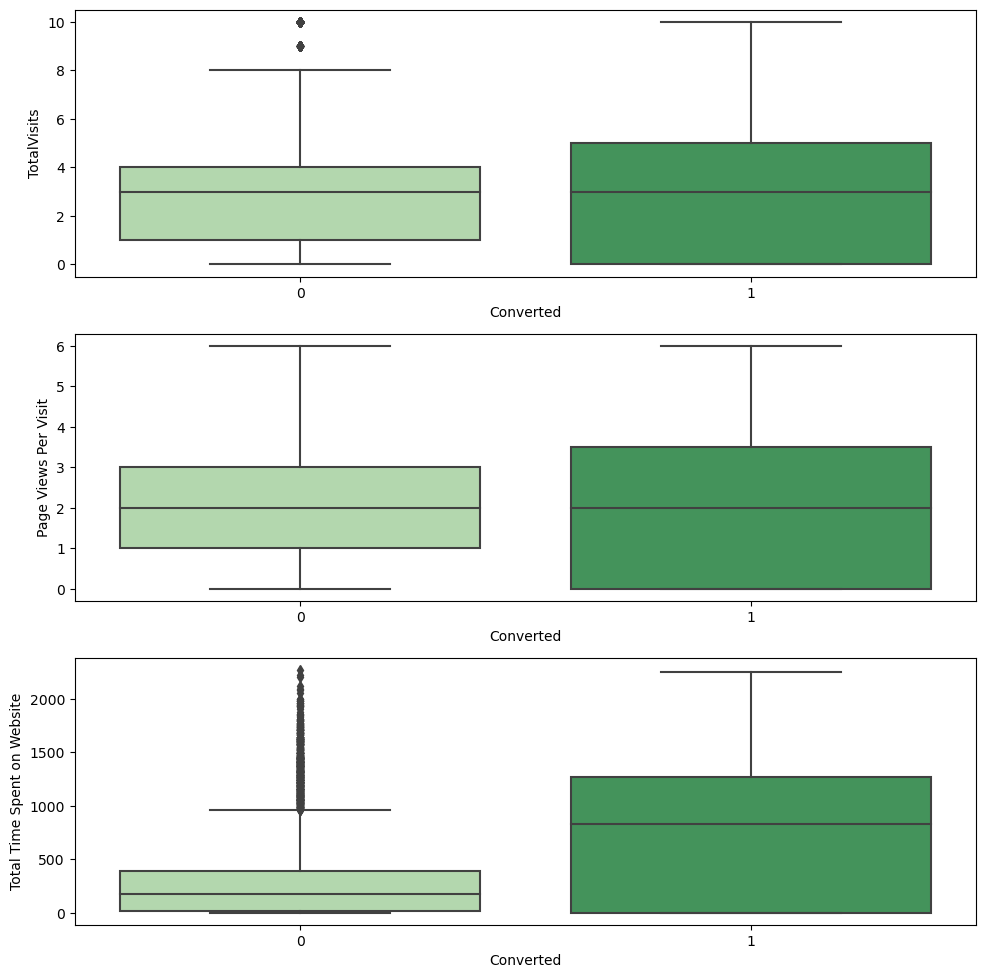

In [2446]:
#checking Spread of "Total Visits","Page Views Per Visit","Total Time Spent on Website"  vs Converted variable

fig, axes = plt.subplots(3,1,figsize=(10,10))
fig.tight_layout(pad=2.0)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df,ax=axes[0],palette='Greens')
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df,ax=axes[1],palette='Greens')
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df,ax=axes[2],palette='Greens')


##### Observation : 
1 TotalVisits
   - Median for converted and not converted leads are close.So we cannot conclude anything on basis of TotalVisits<br><br>
2 Page Views Per Visit 
   - Median for converted and not converted leads are close.So we cannot conclude anything on basis of Page Views Per Visit<br><br>
3 Total Time Spent on Website
   - Leads spending more time on the website are more likely to be converted

#### Dummy Variable creation

In [2447]:
# Converting binary variables (Yes/No) to (1/0)

vars =  ['Do Not Email','A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

df[vars] = df[vars].apply(binary_map)

In [2448]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity','Tags']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [2449]:
# Concatenating the dummy_data to the df dataframe
df = pd.concat([df, dummy_data], axis=1)
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,...,0,1,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,1,0,0,0,0,0,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,...,0,0,1,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,...,0,0,1,0,0,0,0,0,0,1


In [2450]:
#Dropping the columns for which dummies were created
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity','Tags','Prospect ID'], axis = 1)
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,...,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


#### Splitting Dataset into training and test data

In [2451]:
# Putting response variable to y
y = df['Converted']

y.head()

X=df.drop('Converted', axis=1)

In [2452]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [2453]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 3009 to 5754
Data columns (total 62 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6351 non-null   int64  
 1   TotalVisits                                           6351 non-null   float64
 2   Total Time Spent on Website                           6351 non-null   int64  
 3   Page Views Per Visit                                  6351 non-null   float64
 4   A free copy of Mastering The Interview                6351 non-null   int64  
 5   Lead Origin_Landing Page Submission                   6351 non-null   uint8  
 6   Lead Origin_Lead Add Form                             6351 non-null   uint8  
 7   Lead Origin_Lead Import                               6351 non-null   uint8  
 8   Lead Source_Google                                    6

#### Scaling Numerical Features

In [2454]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,...,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email
3009,0,-0.432779,-0.160255,-0.155018,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1012,1,-0.432779,-0.540048,-0.155018,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
9226,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4750,0,-0.432779,1.643304,-0.155018,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
7987,0,0.643547,2.017593,0.122613,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


#### Model Building using Stats Model & RFE:

In [2455]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()



In [2456]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [2457]:
rfe.support_

array([ True, False,  True, False, False,  True,  True, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False,  True,  True,  True,  True])

In [2458]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 18),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('A free copy of Mastering The Interview', False, 23),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 6),
 ('Lead Source_Google', False, 37),
 ('Lead Source_Live Chat', False, 33),
 ('Lead Source_Olark Chat', False, 7),
 ('Lead Source_Organic Search', False, 36),
 ('Lead Source_Others', False, 10),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 21),
 ('Lead Source_Social Media', False, 12),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 31),
 ('Last Activity_Email Link Clicked', False, 4),
 ('Last Activity_Email Opened', False, 2),
 ('Last Activity_Form Submitted on Website', False, 38),
 ('Last Activity_Olark Chat Conversation', False, 11),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visite

In [2459]:
#list of RFE supported columns
RFE_colums = X_train.columns[rfe.support_]
RFE_colums

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Others', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent',
       'Tags_Other_tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [2460]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
     

####  Model 1

In [2461]:
X_train_sm = sm.add_constant(X_train[RFE_colums])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2138.1
Date:                Mon, 20 Mar 2023   Deviance:                       4276.2
Time:                        19:42:28   Pearson chi2:                 8.77e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4830
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.0598      0.358     -8.542      0.000      -3.762      -2.358
Do Not Email                                            -2.0687      0.204    -10.120      0.000      -2.469      -1.668
Total Time Spent on Website                              1.0606      0.043     24.910      0.000       0.977       1.144
Lead Origin_Landing Page Submission                     -1.4140      0.139    -10.144      0.000      -1.687      -1.141
Lead Origin_Lead Add Form                                0.9289      0.898      1.034      0.301      -0.832       2.689
Lead Source_Reference                                    2.8035      0.939      2.987      0.003       0.964       4.643
Lead Source_Welingak Website                             4.5780      1.158      3.955      0.000       2.309       6.847
Last Activity_Others                                     0.8418      0.335      2.510      0.012       0.184       1.499
Specialization_Others                                   -1.4301      0.141    -10.125      0.000      -1.707      -1.153
What is your current occupation_Housewife               22.4109   1.48e+04      0.002      0.999   -2.91e+04    2.91e+04
What is your current occupation_Working Professional     2.5356      0.229     11.096      0.000       2.088       2.983
Last Notable Activity_Others                             0.9672      0.392      2.468      0.014       0.199       1.735
Last Notable Activity_SMS Sent                           2.2892      0.101     22.660      0.000       2.091       2.487
Tags_Other_tags                                          2.6304      0.358      7.355      0.000       1.929       3.331
Tags_Ringing                                            -1.2233      0.434     -2.816      0.005      -2.075      -0.372
Tags_Will revert after reading the email                 3.6831      0.353     10.432      0.000       2.991       4.375
========================================================================================================================
"""

-  Since P value of "What is your current occupation_Housewife" is high we can drop it

In [2462]:
RFE_colums = RFE_colums.drop('What is your current occupation_Housewife',1)

####  Model 2

In [2463]:
X_train_sm = sm.add_constant(X_train[RFE_colums])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2141.8
Date:                Mon, 20 Mar 2023   Deviance:                       4283.6
Time:                        19:42:28   Pearson chi2:                 8.78e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4824
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.0584      0.358     -8.539      0.000      -3.760      -2.356
Do Not Email                                            -2.0715      0.204    -10.138      0.000      -2.472      -1.671
Total Time Spent on Website                              1.0597      0.043     24.920      0.000       0.976       1.143
Lead Origin_Landing Page Submission                     -1.4115      0.139    -10.137      0.000      -1.684      -1.139
Lead Origin_Lead Add Form                                0.9267      0.898      1.032      0.302      -0.833       2.687
Lead Source_Reference                                    2.8149      0.938      3.001      0.003       0.976       4.654
Lead Source_Welingak Website                             4.5795      1.157      3.957      0.000       2.311       6.848
Last Activity_Others                                     0.8378      0.335      2.498      0.012       0.180       1.495
Specialization_Others                                   -1.4335      0.141    -10.159      0.000      -1.710      -1.157
What is your current occupation_Working Professional     2.5307      0.229     11.074      0.000       2.083       2.979
Last Notable Activity_Others                             0.9672      0.392      2.469      0.014       0.199       1.735
Last Notable Activity_SMS Sent                           2.2850      0.101     22.628      0.000       2.087       2.483
Tags_Other_tags                                          2.6340      0.358      7.366      0.000       1.933       3.335
Tags_Ringing                                            -1.2226      0.434     -2.815      0.005      -2.074      -0.371
Tags_Will revert after reading the email                 3.6854      0.353     10.440      0.000       2.994       4.377
========================================================================================================================
"""

-  Since P value of "Lead Origin_Lead Add Form" is high we can drop it

In [2464]:
RFE_colums = RFE_colums.drop('Lead Origin_Lead Add Form',1)

####  Model 3

In [2465]:
X_train_sm = sm.add_constant(X_train[RFE_colums])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2142.4
Date:                Mon, 20 Mar 2023   Deviance:                       4284.8
Time:                        19:42:28   Pearson chi2:                 8.79e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4823
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.0507      0.358     -8.519      0.000      -3.753      -2.349
Do Not Email                                            -2.0727      0.204    -10.142      0.000      -2.473      -1.672
Total Time Spent on Website                              1.0594      0.043     24.917      0.000       0.976       1.143
Lead Origin_Landing Page Submission                     -1.4241      0.139    -10.253      0.000      -1.696      -1.152
Lead Source_Reference                                    3.7349      0.292     12.803      0.000       3.163       4.307
Lead Source_Welingak Website                             5.5030      0.734      7.500      0.000       4.065       6.941
Last Activity_Others                                     0.8372      0.335      2.496      0.013       0.180       1.495
Specialization_Others                                   -1.4435      0.141    -10.246      0.000      -1.720      -1.167
What is your current occupation_Working Professional     2.5289      0.229     11.062      0.000       2.081       2.977
Last Notable Activity_Others                             0.9665      0.392      2.466      0.014       0.198       1.735
Last Notable Activity_SMS Sent                           2.2867      0.101     22.646      0.000       2.089       2.485
Tags_Other_tags                                          2.6396      0.358      7.380      0.000       1.939       3.341
Tags_Ringing                                            -1.2193      0.434     -2.807      0.005      -2.071      -0.368
Tags_Will revert after reading the email                 3.6902      0.353     10.451      0.000       2.998       4.382
========================================================================================================================
"""

#### Checking for VIF values

In [2466]:
vif = pd.DataFrame()
vif['Features'] = X_train[RFE_colums].columns
vif['VIF'] = [variance_inflation_factor(X_train[RFE_colums].values, i) for i in range(X_train[RFE_colums].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Tags_Will revert after reading the email,5.13
2,Lead Origin_Landing Page Submission,4.60
6,Specialization_Others,3.18
10,Tags_Other_tags,2.52
11,Tags_Ringing,2.03
8,Last Notable Activity_Others,1.56
9,Last Notable Activity_SMS Sent,1.48
5,Last Activity_Others,1.46
3,Lead Source_Reference,1.36
7,What is your current occupation_Working Profes...,1.24


In [2467]:
# Since "Tags_Will revert after reading the email" has high VIF we can drop it

RFE_colums = RFE_colums.drop('Tags_Will revert after reading the email')

#### Model 4

In [2468]:
X_train_sm = sm.add_constant(X_train[RFE_colums])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2271.5
Date:                Mon, 20 Mar 2023   Deviance:                       4542.9
Time:                        19:42:29   Pearson chi2:                 8.73e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4608
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2114      0.121      1.747      0.081      -0.026       0.449
Do Not Email                                            -2.0130      0.202     -9.965      0.000      -2.409      -1.617
Total Time Spent on Website                              1.0321      0.041     25.344      0.000       0.952       1.112
Lead Origin_Landing Page Submission                     -1.1924      0.128     -9.288      0.000      -1.444      -0.941
Lead Source_Reference                                    3.8125      0.285     13.395      0.000       3.255       4.370
Lead Source_Welingak Website                             5.6101      0.733      7.654      0.000       4.174       7.047
Last Activity_Others                                     0.7592      0.313      2.423      0.015       0.145       1.373
Specialization_Others                                   -1.2513      0.131     -9.561      0.000      -1.508      -0.995
What is your current occupation_Working Professional     2.3784      0.208     11.441      0.000       1.971       2.786
Last Notable Activity_Others                             1.1661      0.372      3.138      0.002       0.438       1.895
Last Notable Activity_SMS Sent                           2.4100      0.099     24.356      0.000       2.216       2.604
Tags_Other_tags                                         -0.8414      0.091     -9.288      0.000      -1.019      -0.664
Tags_Ringing                                            -4.7815      0.265    -18.053      0.000      -5.301      -4.262
========================================================================================================================
"""

In [2469]:
#checking VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[RFE_colums].columns
vif['VIF'] = [variance_inflation_factor(X_train[RFE_colums].values, i) for i in range(X_train[RFE_colums].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,1.83
8,Last Notable Activity_Others,1.56
5,Last Activity_Others,1.46
9,Last Notable Activity_SMS Sent,1.42
10,Tags_Other_tags,1.36
6,Specialization_Others,1.27
11,Tags_Ringing,1.26
0,Do Not Email,1.21
3,Lead Source_Reference,1.21
1,Total Time Spent on Website,1.20


- Since VIF values are low for all the columns Model 4 is the final model.We have 12 variables in our final model

#### Making predictions on Train set

In [2470]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:12]

3009    0.241154
1012    0.221297
9226    0.001183
4750    0.957919
7987    0.564654
1281    0.914921
2880    0.131177
4971    0.976911
7536    0.863846
1248    0.020943
1429    0.632031
2178    0.048732
dtype: float64

In [2471]:
#Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
3009,0,0.241154,3009
1012,0,0.221297,1012
9226,0,0.001183,9226
4750,1,0.957919,4750
7987,1,0.564654,7987


In [2472]:
#Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels
# =Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
3009,0,0.241154,3009,0
1012,0,0.221297,1012,0
9226,0,0.001183,9226,0
4750,1,0.957919,4750,1
7987,1,0.564654,7987,1


#### Creating Confusion Matrix

In [2473]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3510  395]
 [ 560 1886]]


In [2474]:
## Predicted vs Actual
#                 Not_converted    Converted
# --------------------------------------------
# Not converted    TN               FP
# Converted        FN               TP

In [2475]:
# Overall Accuracy Check

print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8496299795307826


In [2476]:
###Other Metrics

TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
TP = confusion[1,1] # true positive 

In [2477]:
# Sensitivity 

print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7710547833197057


In [2478]:
# Specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8988476312419974


In [2479]:
print("False Positive Rate :",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print ("Negative predictive value :",TN / float(TN+ FN))

False Positive Rate : 0.10115236875800256
Positive Predictive Value : 0.8268303375712407
Negative predictive value : 0.8624078624078624


- Specificity is good with 89% , Sensitivity is low 77%

#### Plotting the ROC Curve

- ROC curve shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

In [2480]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

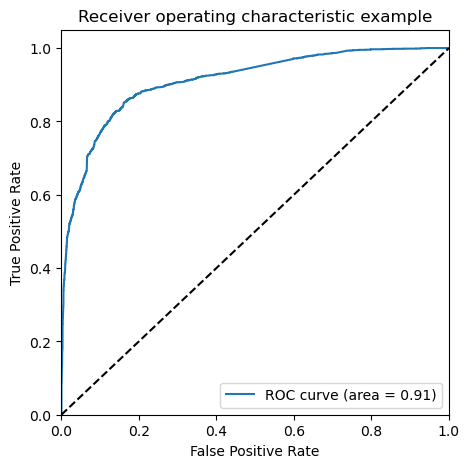

In [2481]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )
#Draw ROC curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

- The ROC Curve should be a value close to 1. We are getting a good value of 0.91 indicating a good predictive model.

#### Finding Optimal Cutoff Point

In [2482]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.241154,3009,0,1,1,1,0,0,0,0,0,0,0
1012,0,0.221297,1012,0,1,1,1,0,0,0,0,0,0,0
9226,0,0.001183,9226,0,1,0,0,0,0,0,0,0,0,0
4750,1,0.957919,4750,1,1,1,1,1,1,1,1,1,1,1
7987,1,0.564654,7987,1,1,1,1,1,1,1,0,0,0,0


In [2483]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.385136     1.000000     0.000000
0.1   0.1  0.610298     0.973835     0.382586
0.2   0.2  0.795623     0.898201     0.731370
0.3   0.3  0.840655     0.859362     0.828937
0.4   0.4  0.848213     0.820114     0.865813
0.5   0.5  0.849630     0.771055     0.898848
0.6   0.6  0.845379     0.710957     0.929577
0.7   0.7  0.819713     0.594031     0.961076
0.8   0.8  0.801606     0.517171     0.979770
0.9   0.9  0.767596     0.412919     0.989757


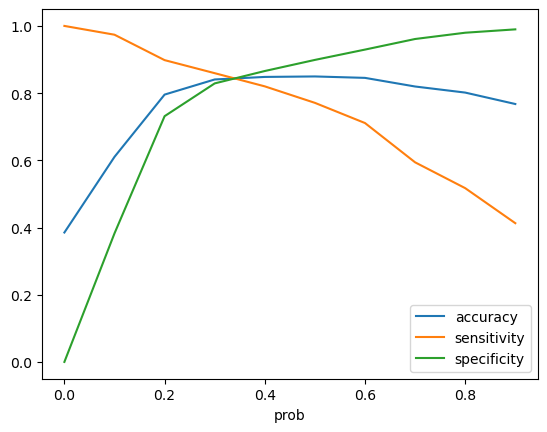

In [2484]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

- From the curve above, 0.35 is the optimum point to take it as a cutoff probability

In [2485]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3009,0,0.241154,3009,0,1,1,1,0,0,0,0,0,0,0,0
1012,0,0.221297,1012,0,1,1,1,0,0,0,0,0,0,0,0
9226,0,0.001183,9226,0,1,0,0,0,0,0,0,0,0,0,0
4750,1,0.957919,4750,1,1,1,1,1,1,1,1,1,1,1,1
7987,1,0.564654,7987,1,1,1,1,1,1,1,0,0,0,0,1


#### Assigning Lead Score to the Training data

In [2486]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
3009,0,0.241154,3009,0,1,1,1,0,0,0,0,0,0,0,0,24
1012,0,0.221297,1012,0,1,1,1,0,0,0,0,0,0,0,0,22
9226,0,0.001183,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
4750,1,0.957919,4750,1,1,1,1,1,1,1,1,1,1,1,1,96
7987,1,0.564654,7987,1,1,1,1,1,1,1,0,0,0,0,1,56


#### Model Evaluation

In [2487]:
# Accuracy Check
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8425444811840656


In [2488]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3311,  594],
       [ 406, 2040]], dtype=int64)

In [2489]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [2490]:
# Sensitivity and Specificity check
print("Sensitivity :",TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))


Sensitivity : 0.8340147179067866
Specificity : 0.847887323943662


In [2491]:
print("False Positive rate : ",FP/ float(TN+FP))
print("Positive Predictive Value : ",TP / float(TP+FP))
print("Negative Predictive Value : ",TN / float(TN+ FN))

False Positive rate :  0.15211267605633802
Positive Predictive Value :  0.7744874715261959
Negative Predictive Value :  0.8907721280602636


In [2492]:
# Precision 
TP / TP + FP
print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

# Recall
TP / TP + FN
print("Recall : ",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Precision :  0.8268303375712407
Recall :  0.7710547833197057


In [2493]:
# Precision and recall tradeoff
y_train_pred_final.Converted, y_train_pred_final.predicted

(3009    0
 1012    0
 9226    0
 4750    1
 7987    1
        ..
 367     0
 82      1
 8199    0
 7077    0
 5754    0
 Name: Converted, Length: 6351, dtype: int64,
 3009    0
 1012    0
 9226    0
 4750    1
 7987    1
        ..
 367     0
 82      1
 8199    0
 7077    0
 5754    1
 Name: predicted, Length: 6351, dtype: int64)

In [2494]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

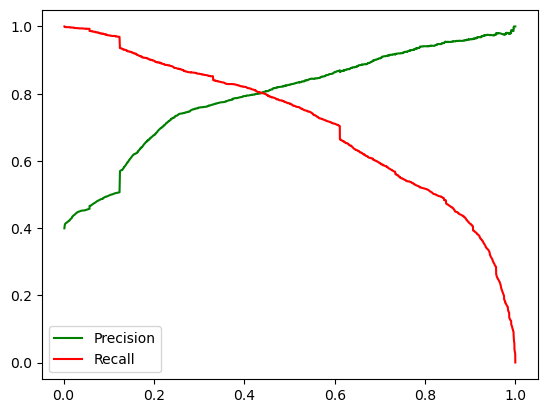

In [2495]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.legend(['Precision','Recall'])
plt.show()

#### Making predictions on the test set

##### Scaling the test data

In [2496]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [2497]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[RFE_colums]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Others,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Others,Last Notable Activity_SMS Sent,Tags_Other_tags,Tags_Ringing
3271,0,-0.600595,0,0,0,0,1,0,0,0,0,0
1490,0,1.887326,1,0,0,0,0,1,0,0,0,0
7936,0,-0.752879,0,0,0,0,1,0,0,0,0,0
4216,0,-0.888650,0,1,0,0,0,0,0,0,1,0
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0


In [2498]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:12]

3271    0.159789
1490    0.965953
7936    0.139797
4216    0.905961
3830    0.169722
1800    0.651153
6507    0.017543
4821    0.190300
4223    0.986148
4714    0.123780
3977    0.712854
4209    0.123780
dtype: float64

In [2499]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.159789
1490,0.965953
7936,0.139797
4216,0.905961
3830,0.169722


In [2500]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [2501]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index
y_test_df.head()

,Converted,Prospect ID
3271,0,3271
1490,1,1490
7936,0,7936
4216,1,4216
3830,0,3830


In [2502]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [2503]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.159789
1,1,1490,0.965953
2,0,7936,0.139797
3,1,4216,0.905961
4,0,3830,0.169722


In [2504]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [2505]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.159789
1,1490,1,0.965953
2,7936,0,0.139797
3,4216,1,0.905961
4,3830,0,0.169722


In [2506]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.159789,0
1,1490,1,0.965953,1
2,7936,0,0.139797,0
3,4216,1,0.905961,1
4,3830,0,0.169722,0


In [2507]:
# Accuracy check
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8351083363936834


In [2508]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1476,  258],
       [ 191,  798]], dtype=int64)

In [2509]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [2510]:
# Sensitivity and Specificity check
print("Sensitivity :",TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))

Sensitivity : 0.8068756319514662
Specificity : 0.8512110726643599


In [2511]:
print("False Positive rate : ",FP/ float(TN+FP))
print("Positive Predictive Value : ",TP / float(TP+FP))
print("Negative Predictive Value : ",TN / float(TN+ FN))

False Positive rate :  0.14878892733564014
Positive Predictive Value :  0.7556818181818182
Negative Predictive Value :  0.8854229154169166


#### Assigning Lead Score to the Testing data

In [2512]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.159789,0,16
1,1490,1,0.965953,1,97
2,7936,0,0.139797,0,14
3,4216,1,0.905961,1,91
4,3830,0,0.169722,0,17


### Observation:

##### Train Data Observations
- Accuracy : 84.9%
- Sensitivity : 77.1%
- Specificity : 89.8%

##### Test Data Observations
- Accuracy : 83.5%
- Sensitivity : 80.6%
- Specificity : 85.1%


- The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [2513]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.965953,1,97
3,4216,1,0.905961,1,91
8,4223,1,0.986148,1,99
16,1946,1,0.941472,1,94
21,2461,1,0.997678,1,100
...,...,...,...,...,...
2694,1566,1,0.944291,1,94
2699,6461,1,0.988693,1,99
2703,5741,1,0.971541,1,97
2715,6299,1,0.907662,1,91


- There are 482 leads which can be contacted and have a high chance of getting converted.

In [2514]:
# The Prospect ID of the customers to be contacted
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 4216, 4223, 1946, 2461, 5822, 2684, 4809, 2010, 4062, 7696,
       9049, 1518, 4543, 4830, 1158, 7546, 6629, 3542, 7347, 2504, 5913,
       7674, 8596, 4003, 4963, 6947, 4807,  446,  789, 8372, 5805, 1586,
       4478, 3758, 1561,  737, 9034, 3631, 6582, 6423, 8286, 4047, 7174,
       1436, 7552, 5173, 3932, 4080, 1475, 5785, 7253, 4297, 5490, 1995,
       6532, 4498, 5797, 8687,  211, 4149, 8255, 2018, 6743, 3703, 3307,
       7680, 4208, 3976, 5769, 1051, 5742, 1663, 3288, 6557, 2199, 8959,
       7521, 8966, 6177, 8282, 3688, 6297, 7239, 8213, 4462, 5009, 5292,
       6913, 6015, 1481,  785, 3265, 3285, 7433, 2460, 3685, 3810, 2009,
       8106,  373, 4446, 3055, 4179, 8076, 4994, 8568, 7268, 4353, 6784,
       6754, 7236, 2960, 3983, 4487,  802, 8745, 4455, 4717,  505, 6094,
       4992, 7036, 2680,  112, 6149, 2589, 7157, 3827, 5435, 7175, 1675,
       6999, 5932, 5826, 6627, 8492, 4624, 6499, 6199, 2481, 3439, 4612,
       7468, 4793, 6649, 1557, 4837, 2495,  822, 31

In [2515]:
## Model4 is our final model and lets check the features
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.610075
Lead Source_Reference                                   3.812499
Last Notable Activity_SMS Sent                          2.410007
What is your current occupation_Working Professional    2.378355
Last Notable Activity_Others                            1.166143
Total Time Spent on Website                             1.032139
Last Activity_Others                                    0.759155
const                                                   0.211407
Tags_Other_tags                                        -0.841407
Lead Origin_Landing Page Submission                    -1.192363
Specialization_Others                                  -1.251305
Do Not Email                                           -2.012959
Tags_Ringing                                           -4.781536
dtype: float64

### Conclusion

- The company should make calls to the leads coming from the lead sources "Welingak Websites" and "Reference" as these are more likely to get converted.
- The company should make calls to the leads whose last activity was SMS Sent as they are more likely to get converted.
- The company should make calls to the leads who are the "working professionals" as they are more likely to get converted.